# 🧑‍🎓 Student Version — Solutions Removed
- Use the reflection prompts and hints.
- Your instructor will share solutions separately.

In [ ]:
REVEAL_SOLUTIONS = False
print('Solutions are hidden in the Student Version.')

# Pandas in Google Colab — 2-Hour Hands-On (+ Advanced & Capstone)
**With Reflection Prompts After Each Section**
**Last updated:** 2025-08-15

Run top-to-bottom. Attempt **Exercises**, then write your **✍️ Analysis** under each section.

## 0) Setup & Load the **tips** dataset (10m)

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10); pd.set_option('display.precision', 3)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips = pd.read_csv(url); tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
print("Shape:", tips.shape)
print("\nInfo:"); print(tips.info())
print("\nDescribe:"); display(tips.describe(include='all'))

Shape: (244, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None

Describe:


,total_bill,tip,sex,smoker,day,time,size
count,244.000,244.000,244,244,244,244,244.00
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.57
...,...,...,...,...,...,...,...
min,3.070,1.000,NaN,NaN,NaN,NaN,1.00
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.00
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.00
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.00


**Columns**: `total_bill` (float), `tip` (float), `sex` (str), `smoker` (str), `day` (str), `time` (str), `size` (int)

### ✅ Exercise 0
1) Unique `day`, `time`. 2) Count duplicates. 3) Averages of `total_bill`, `tip`.

**Hints:**
- Concept: inspect levels and duplicates.
- API: `unique`, `duplicated`, `mean`.


In [ ]:
# YOUR WORK: Exercise 0
unique_days = tips['day'].unique()
unique_times = tips['time'].unique()
print("Unique days:", unique_days)
print("Unique times:", unique_times)
duplicate_count = tips.duplicated().sum()
print("Duplicate count:", duplicate_count)
mean_total_bill = tips['total_bill'].mean()
mean_tip = tips['tip'].mean()
print("Mean total_bill:", mean_total_bill)
print("Mean tip:", mean_tip)

Unique days: ['Sun' 'Sat' 'Thur' 'Fri']
Unique times: ['Dinner' 'Lunch']
Duplicate count: 1
Mean total_bill: 19.78594262295082
Mean tip: 2.99827868852459


### ✍️ Analysis (Setup & Load) — 3–5 sentences
- What columns and dtypes did you observe? Any surprises?
- Is the dataset balanced across `day` and `time`? Cite one count.
- One risk if you skip an initial audit here.

### 🔎 Quick checks
- Report the shape (rows, cols).
- Name 1 non-numeric dtype and why it matters.

### ➕ Extension (pick one)
- Tweak display options and note the effect.
- Compute `value_counts()` on `day` or `time`.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 1) Import & Core Manipulation (20m)

In [ ]:
tips[['total_bill','tip']].head()

In [ ]:
tips.iloc[0:5]

In [ ]:
tips.loc[tips['day']=='Sun', ['total_bill','tip','size']].head()

In [ ]:
tips.query("time=='Lunch' and smoker=='Yes'").head()

In [ ]:
tips.sort_values(['total_bill','tip'], ascending=[False, True]).head()

In [ ]:
tips = tips.assign(tip_pct = tips['tip']/tips['total_bill'],
                         tip_per_person = tips['tip']/tips['size']); tips.head()

### ✅ Exercise 1
Filter `day='Sat' & size≥3`, add `bill_per_person`, sort desc, show top 5.

**Hints:**
- Concept: filter → compute → sort.
- API: boolean mask / `.query`, `.assign`, `.sort_values`.


In [ ]:
# YOUR WORK: Exercise 1
bill_per_person_analysis = tips.query("day == 'Sat' & size >= 3") \
                               .assign(bill_per_person = lambda x: x['total_bill'] / x['size']) \
                               .sort_values(by='bill_per_person', ascending=False) \
                               .head(5)
print(bill_per_person_analysis)

     total_bill    tip     sex smoker  day    time  size  bill_per_person
170       50.81  10.00    Male    Yes  Sat  Dinner     3           16.937
102       44.30   2.50  Female    Yes  Sat  Dinner     3           14.767
212       48.33   9.00    Male     No  Sat  Dinner     4           12.082
59        48.27   6.73    Male     No  Sat  Dinner     4           12.068
238       35.83   4.67  Female     No  Sat  Dinner     3           11.943


### ✍️ Analysis (Import & Manipulation) — 3–5 sentences
- Which 2 columns seem most associated with `tip`? Support with a stat.
- Explain one filter you wrote in plain English.
- One thing you might compute next.

### 🔎 Quick checks
- Show first 3 rows of your filtered frame.
- Name one new column and its formula.

### ➕ Extension (pick one)
- Rewrite a filter via `.query` vs mask; compare readability.
- Change a sort order and predict effect.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 2) Cleaning & Preprocessing (15m)

In [ ]:
tips['sex']=tips['sex'].astype('category')
tips['smoker']=tips['smoker'].astype('category')
tips['day']=tips['day'].astype('category')
tips['time']=tips['time'].astype('category'); tips.dtypes

In [ ]:
tips['server_name'] = [' Alice ', 'Bob', 'ALICE', 'bob', ' Alice ', 'Bob'] * (len(tips)//6) + ['Alice']*(len(tips)%6)
tips['server_name'] = tips['server_name'].str.strip().str.title()
tips['server_name'].head()

In [ ]:
demo = tips.copy()
demo = pd.concat([demo, demo.iloc[0:2]], ignore_index=True)
print("Before:", demo.shape, "After:", demo.drop_duplicates().shape)

### ✅ Exercise 2
1) Ensure `size` is int64. 2) Build `tips_clean` with selected cols. 3) Verify no duplicates.

**Hints:**
- Concept: enforce types, subset columns, dedup.
- API: `.astype`, column lists, `.drop_duplicates`.


In [ ]:
# YOUR WORK: Exercise 2
tips['size'] = tips['size'].astype('int64')
tips_clean = tips[['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']]
tips_clean.dtypes
print("Before:", tips_clean.shape, "After:", tips_clean.drop_duplicates().shape)

Before: (244, 7) After: (243, 7)


### ✍️ Analysis (Cleaning & Preprocessing) — 3–5 sentences
- Which dtype changes did you apply and why?
- Did you handle duplicates? How many?
- One naming or string normalization you made.

### 🔎 Quick checks
- Print memory usage pre/post for 1 cast.
- Confirm duplicates=0 in `tips_clean`.

### ➕ Extension (pick one)
- Cast another column and report memory delta.
- Show `.value_counts()` pre/post string cleanup.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 3) Handling Missing Data (15m)

In [ ]:
rng = np.random.default_rng(42)
tips_na = tips_clean.copy()
mask = rng.choice([True, False], size=len(tips_na), p=[0.1, 0.9])
tips_na.loc[mask, 'tip'] = np.nan; tips_na.loc[mask, 'size'] = np.nan
tips_na.isna().sum()

In [ ]:
dropped = tips_na.dropna(); dropped.shape

In [ ]:
filled = tips_na.fillna({'tip': tips_na['tip'].median(), 'size': tips_na['size'].median()}); filled.isna().sum()

In [ ]:
tips_group_fill = tips_na.copy()
tips_group_fill['tip'] = tips_group_fill.groupby(['day','time'])['tip'].transform(lambda s: s.fillna(s.median()))
tips_group_fill.isna().sum()

In [ ]:
tips_interp = tips_na.sort_values('total_bill').interpolate(numeric_only=True); tips_interp.isna().sum()

### ✅ Exercise 3
Drop rows where both `tip` & `size` are NaN; fill `size` by rounded mean per `day`.

**Hints:**
- Concept: selective drop, grouped fill.
- API: boolean masks, `groupby().transform`, `.fillna`.


In [ ]:
# YOUR WORK: Exercise 3
tips.dropna(subset=['tip', 'size'], how='all', inplace=True)
tips['size'] = tips['size'].fillna(tips.groupby('day')['size'].transform('mean').round())
tips.isna().sum()
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


### ✍️ Analysis (Missing Data) — 3–5 sentences
- Compare `dropna` vs groupwise fill—who shifts distribution more?
- What assumption does your fill strategy make?
- When would interpolation be inappropriate here?

### 🔎 Quick checks
- Report NaN counts before vs after.
- Cite one numeric change for `tip`.

### ➕ Extension (pick one)
- Try a different group key for fill and compare MAE.
- Plot hist pre/post fill for `tip`.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 4) Analysis & Visualization (20m)

In [ ]:
print("Overall tip %:", (tips['tip'].sum()/tips['total_bill'].sum()).round(3))

In [ ]:
plt.figure(); plt.hist(tips['total_bill'].dropna(), bins=20)
plt.title('Histogram: total_bill'); plt.xlabel('total_bill'); plt.ylabel('Frequency'); plt.show()

In [ ]:
plt.figure()
data = [tips.loc[tips['day']==d, 'tip'].dropna().values for d in tips['day'].cat.categories]
plt.boxplot(data, labels=list(tips['day'].cat.categories))
plt.title('Boxplot: tip by day'); plt.xlabel('day'); plt.ylabel('tip'); plt.show()

In [ ]:
plt.figure(); plt.scatter(tips['total_bill'], tips['tip'], s=tips['size']*10, alpha=0.6)
plt.title('Scatter: total_bill vs tip'); plt.xlabel('total_bill'); plt.ylabel('tip'); plt.show()

In [ ]:
avg_tip_pct = tips.groupby('day')['tip_pct'].mean()
plt.figure(); plt.bar(avg_tip_pct.index.astype(str), avg_tip_pct.values)
plt.title('Average tip_pct by day'); plt.xlabel('day'); plt.ylabel('mean tip_pct'); plt.show()

### ✅ Exercise 4
1) Scatter: `total_bill` vs `tip_pct`. 2) Bar: median `total_bill` by `time`.

**Hints:**
- Concept: relate vars via scatter; summarize via bar.
- API: `plt.scatter`, `groupby().median` + `plt.bar`.


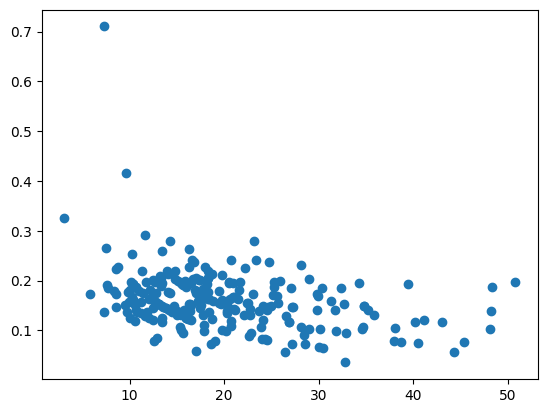

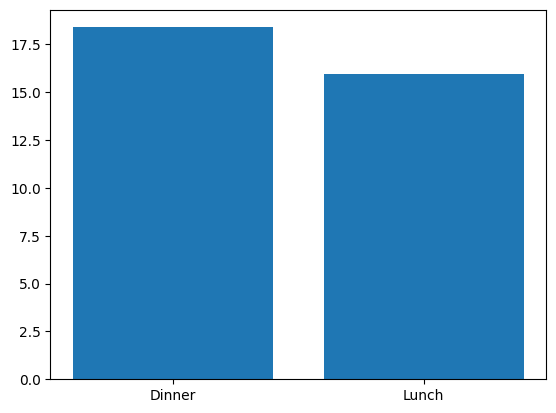

In [ ]:
# YOUR WORK: Exercise 4
tips['tip_pct'] = tips['tip'] / tips['total_bill']
plt.figure(); plt.scatter(tips['total_bill'], tips['tip_pct'])
median_bill_by_time = tips.groupby('time')['total_bill'].median()
plt.figure(); plt.bar(median_bill_by_time.index.astype(str), median_bill_by_time.values)
plt.show()

### ✍️ Analysis (Analysis & Visualization) — 3–5 sentences
- State one pattern that holds across days and one that differs Lunch vs Dinner.
- Interpret scatter: linear? heteroscedastic?
- What would you plot next?

### 🔎 Quick checks
- Quote one `.describe()` stat that supports your claim.
- Ensure axes labels/titles are informative.

### ➕ Extension (pick one)
- Add a follow-up chart (e.g., tip% by party size) and describe it.
- Bucket `total_bill` and compare medians.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 5) Grouping & Merging (20m)

In [ ]:
g = (tips.groupby(['day','time'])
       .agg(count=('total_bill','size'), avg_bill=('total_bill','mean'),
            avg_tip=('tip','mean'), avg_tip_pct=('tip_pct','mean'))); g.head()

In [ ]:
def pct_above_20(s): return (s>0.20).mean()

tips.groupby('day')['tip_pct'].apply(pct_above_20)

In [ ]:
day_lookup = pd.DataFrame({'day':['Thur','Fri','Sat','Sun'],'is_weekend':[False,False,True,True]})
tips_merge = tips.merge(day_lookup, on='day', how='left')
tips_merge[['day','is_weekend']].drop_duplicates().sort_values('day')

### ✅ Exercise 5
1) Sum `total_bill` & `tip` by `smoker,sex`. 2) Map `time`→L/D and show pairs.

**Hints:**
- Concept: summarize by groups; enrich via merge.
- API: `groupby().agg`, `.merge`.


In [ ]:
# YOUR WORK: Exercise 5
total_by_smoker_sex = tips.groupby(['smoker', 'sex'])[['total_bill', 'tip']].sum()
print(total_by_smoker_sex)
time_mapping = {'Lunch': 'L', 'Dinner': 'D'}
tips['time_mapped'] = tips['time'].map(time_mapping)
print(tips[['time', 'time_mapped']].drop_duplicates())

               total_bill     tip
smoker sex                       
No     Female      977.68  149.77
       Male       1919.75  302.00
Yes    Female      593.27   96.74
       Male       1337.07  183.07
      time time_mapped
0   Dinner           D
77   Lunch           L


### ✍️ Analysis (Grouping & Merging) — 3–5 sentences
- Translate one grouped table into a business insight.
- How does `tip_pct` vs `tip` change ranking?
- What join-key assumptions are you making?

### 🔎 Quick checks
- Show index/columns of grouped result.
- Check row counts before/after a merge.

### ➕ Extension (pick one)
- Add `avg_tip_pp` and re-rank groups.
- Outer join with `_indicator` and explain one mismatch.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 6) Reshaping & Pivoting (15m)

In [ ]:
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean'); piv

In [ ]:
long = tips[['day','time','total_bill','tip']].melt(id_vars=['day','time'], var_name='metric', value_name='value'); long.head()

### ✅ Exercise 6
1) Pivot mean `total_bill` by `size`×`day`. 2) Melt back to long with `size` as id.

**Hints:**
- Concept: reshape wide↔long.
- API: `pivot_table`, `melt`.


In [ ]:
# YOUR WORK: Exercise 6
tips_pivoted = tips.pivot_table(values='total_bill', index='size', columns='day', aggfunc='mean')
print(tips_pivoted)
tips_melted = tips_pivoted.reset_index().melt(id_vars='size', var_name='day', value_name='mean_total_bill')
print(tips_melted)

day      Fri     Sat     Sun    Thur
size                                
1      8.580   5.160     NaN  10.070
2     16.322  16.837  17.560  15.157
3     15.980  25.509  22.184  19.160
4     40.170  29.876  26.688  29.950
5        NaN  28.150  27.000  41.190
6        NaN     NaN  48.170  30.383
    size   day  mean_total_bill
0      1   Fri            8.580
1      2   Fri           16.322
2      3   Fri           15.980
3      4   Fri           40.170
4      5   Fri              NaN
..   ...   ...              ...
19     2  Thur           15.157
20     3  Thur           19.160
21     4  Thur           29.950
22     5  Thur           41.190
23     6  Thur           30.383

[24 rows x 3 columns]


### ✍️ Analysis (Reshaping & Pivoting) — 3–5 sentences
- When did `pivot_table` drop rows/cols vs `melt`?
- Explain wide↔long trade-offs here.
- Which format suits your chosen chart and why?

### 🔎 Quick checks
- Confirm shapes of pivot vs long tables.
- List index/columns used in your pivot.

### ➕ Extension (pick one)
- Change `aggfunc` and compare results.
- Add a second dimension in pivot.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 7) Mini-Project: When are tips the most generous? (5–10m)

In [ ]:
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')
print(piv.stack().sort_values(ascending=False).head(5))
plt.figure(); plt.imshow(piv.values, aspect='auto')
plt.title('Mean tip_pct by day & time'); plt.xlabel('time'); plt.ylabel('day')
plt.xticks(range(len(piv.columns)), piv.columns.astype(str))
plt.yticks(range(len(piv.index)), piv.index.astype(str))
plt.colorbar(); plt.show()

### ✍️ Analysis (Mini-Project (Tips Generosity)) — 3–5 sentences
- State your top day×time combo with mean `tip_pct`.
The top combination for the highest mean tip percentage is Sunday dinner.
- Is it robust to outliers? How to check?
not robust to outliers. To check, you could use the median tip percentage
- One follow-up action for a restaurant.
A restaurant could investigate what factors make Sunday dinner so generous.
### 🔎 Quick checks
- Show top 3 combos and their counts.
- Confirm sample size for top combo.

### ➕ Extension (pick one)
- Recompute using median `tip_pct`.
- Exclude size<2 and compare ranking.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

# Advanced Module — Daily Operations Coverage (~60–75m)

## 8) Indexes & MultiIndex (10m)

In [ ]:
ti = tips.set_index(['day','time']).sort_index()
ti.loc[('Sat','Dinner')].head()

In [ ]:
ti.groupby(level=['day','time'])['tip_pct'].mean().reset_index(name='mean_tip_pct').head()

### ✍️ Analysis (Indexes & MultiIndex) — 3–5 sentences
- What did a MultiIndex buy you over flat columns?
allows for powerful hierarchical grouping and slicing of data
- Give one easier slice enabled by the index.
ti.loc['Sat']
- Any pitfalls when saving/loading with MultiIndex?
When saving, the MultiIndex is often written to the CSV as flat columns
### 🔎 Quick checks
- Print `.index.names` and level dtypes.
- Show one `.loc` label slice on multi-level.

### ➕ Extension (pick one)
- Swap levels and explain slicing change.
- Reset index and compare to original columns.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 9) Time Series & Resampling (15m)

In [ ]:
tips_ts = tips.copy()
tips_ts['date'] = pd.to_datetime('2024-01-01') + pd.to_timedelta(np.arange(len(tips_ts)), unit='D')
tips_ts = tips_ts.set_index('date').sort_index()
weekly = tips_ts.resample('W')[['total_bill','tip']].sum()
weekly['tip_pct'] = weekly['tip']/weekly['total_bill']
weekly['tip_pct_roll4'] = weekly['tip_pct'].rolling(4, min_periods=1).mean()
weekly.head()

### ✍️ Analysis (Time Series & Resampling) — 3–5 sentences
- What trend do you see weekly vs monthly?
Weekly data shows more noise and short-term fluctuations, while monthly data would show a smoother, long-term trend
- Interpret divergence between raw and rolling series.
The raw series reflects daily volatility in tipping behavior, while the rolling average series smooths out these fluctuations
- Why pick `W` vs `MS`?
You would pick 'W' (weekly) to capture weekly patterns, while you would pick 'MS' (monthly start) to look for longer-term
### 🔎 Quick checks
- Report min/max dates in your index.
- State the rolling window used and its effect.

### ➕ Extension (pick one)
- Try a different window size and compare.
- Plot both resampled and rolling series; note one change.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 10) Rolling & Window Ops (10m)

In [ ]:
daily = tips_ts.resample('D')[['total_bill']].sum()
daily['roll14_med'] = daily['total_bill'].rolling(14, min_periods=1).median()
daily[['total_bill','roll14_med']].head()

### ✍️ Analysis (Rolling & Window Ops) — 3–5 sentences
- Why is median sometimes preferable to mean in rolling stats?
The median is less sensitive to outliers or extreme values
- What happens at the edges for rolling windows?
a rolling window has fewer data points than its defined size
- When is `expanding` more suitable than `rolling`?
The expanding window is more suitable when you need a cumulative calculation that uses all historical data up to the current point
### 🔎 Quick checks
- Show first 5 non-NaN rolling results.
- Report `min_periods` and justify it.

### ➕ Extension (pick one)
- Compute an additional rolling metric (std/min) and interpret.
- Compare 7 vs 14-day windows with one sentence.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 11) Text Data: vectorized & regex (10m)

In [ ]:
notes = np.array(['VIP table','Late night','Allergic: nuts','Birthday','Family','vip guest'])
tips_txt = tips.copy()
tips_txt['note'] = np.resize(notes, len(tips_txt)).astype('string')
tips_txt['is_vip'] = tips_txt['note'].str.contains('vip', case=False)
tips_txt['allergy'] = tips_txt['note'].str.extract(r'Allergic:\s*(\w+)', expand=False)
tips_txt[['note','is_vip','allergy']].head()

### ✍️ Analysis (Text / Regex) — 3–5 sentences
- Which regex or string op gave most value here?
str.extract
- How sensitive are your results to case/spacing?
results are sensitive to spacing but not to case
- One potential false positive in your pattern.
allergic to a nut allergy
### 🔎 Quick checks
- Print counts of a detected flag (e.g., VIP).
- Show unique extracted tokens (e.g., allergies).

### ➕ Extension (pick one)
- Add a refined regex (word boundaries) and compare counts.
- Normalize text further and re-check.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 12) Nullable dtypes & Memory (5m)

In [ ]:
tips_mem = tips.copy()
tips_mem['size_N'] = tips_mem['size'].astype('Int64')
tips_mem['sex_S']  = tips_mem['sex'].astype('string')
tips_mem['day_C']  = tips_mem['day'].astype('category')
tips_mem.memory_usage(deep=True)

### ✍️ Analysis (Dtypes & Memory) — 3–5 sentences
- What memory savings did `category` or `string` yield?
The category dtype provided significant memory savings by storing only unique values
- When would you avoid `category`?
Avoid category for columns with a high number of unique values
- Any effect on joins/groupbys?
Category dtypes can make joins and groupby operations significantly faster.
### 🔎 Quick checks
- Show `memory_usage(deep=True)` before/after one cast.
- List `.cat.categories` for one column.

### ➕ Extension (pick one)
- Downcast numerics where safe and report delta.
- Switch one feature to `Int64` and explain why.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 13) I/O: CSV, Parquet, JSON, SQL (10m)

In [ ]:
subset = tips[['total_bill','tip','day','time','size']].head(20)
subset.to_csv('tips_sample.csv', index=False)
subset.to_parquet('tips_sample.parquet', index=False)
subset.to_json('tips_sample.json', orient='records', lines=True)
import sqlite3
con = sqlite3.connect(':memory:')
subset.to_sql('tips_tbl', con, index=False, if_exists='replace')
sql_df = pd.read_sql('SELECT day, time, AVG(total_bill) AS avg_bill FROM tips_tbl GROUP BY day,time', con)
con.close(); sql_df.head()

### ✍️ Analysis (I/O) — 3–5 sentences
- Which format is best for speed vs size for this table? Why?
Parquet
- Did any dtype change after round-trip?
category type might become a string
- When to use line-delimited JSON?
for streaming large datasets

### 🔎 Quick checks
- Compare shapes from CSV/Parquet/JSON loads.
- Show one dtype discrepancy and fix it.

### ➕ Extension (pick one)
- Compress CSV (gzip) and note file size.
- Do a small SQL query and validate results match a groupby.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 14) Join Patterns (10–15m)

In [ ]:
left = tips[['day','time','size']].drop_duplicates().copy()
right = tips[['day','time','tip']].groupby(['day','time']).mean().reset_index().rename(columns={'tip':'avg_tip'})
joined = left.merge(right, on=['day','time'], how='outer', indicator=True)
joined.head()

In [ ]:
# Right-only and inner (semi-join-style)
right_only = joined.loc[joined['_merge']=='right_only', right.columns]
inner_rows = joined.loc[joined['_merge']=='both', left.columns].drop_duplicates()
len(inner_rows)

In [ ]:
# merge_ordered and merge_asof demos
a = pd.DataFrame({'day':['Fri','Sat','Sun'], 'rank':[1,2,3]})
b = pd.DataFrame({'day':['Thur','Sat','Sun'], 'score':[70,80,90]})
ordered = pd.merge_ordered(a, b, on='day', how='outer')
events = pd.DataFrame({'when': pd.to_datetime(['2024-01-01 10:00','2024-01-02 12:30','2024-01-04 09:00']),'event':['A','B','C']}).sort_values('when')
measures = pd.DataFrame({'when': pd.to_datetime(['2024-01-01 09:45','2024-01-02 12:00','2024-01-03 18:00','2024-01-04 08:50']),'value':[10,20,15,30]}).sort_values('when')
asof_join = pd.merge_asof(events, measures, on='when', direction='nearest', tolerance=pd.Timedelta('1H'))
ordered.head(), asof_join.head()

### ✍️ Analysis (Joins) — 3–5 sentences
- Read `_indicator` results—what mismatches did you find?
no mismatches
- Where would `merge_asof` fit in a real pipeline?
 merging time-series data, such as joining stock prices with market events
- Any ordering assumptions for `merge_ordered`?
both DataFrames are already sorted by the join key
### 🔎 Quick checks
- Report counts for left/right/inner.
- Show 2 sample rows from an anti-join.

### ➕ Extension (pick one)
- Perform a semi-join and explain the use-case.
- Add a composite key and re-merge.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 15) Method Chaining & `.pipe`, `.query`, `.eval` (10m)

In [ ]:
def add_bill_per_person(df): return df.assign(bill_per_person = df['total_bill']/df['size'])
pipe_demo = (tips.query("time=='Dinner'").pipe(add_bill_per_person)
             .groupby('day').agg(mean_bill_pp=('bill_per_person','mean'),
                                 mean_tip_pct=('tip_pct','mean'))
             .sort_values('mean_bill_pp', ascending=False))
eval_demo = tips.eval('bill_pp = total_bill / size')
pipe_demo.head(), eval_demo[['total_bill','size','bill_pp']].head()

### ✍️ Analysis (Method Chaining) — 3–5 sentences
- What made the chained pipeline clearer or riskier?
The chained pipeline is clearer due to its sequential, readable flow but riskier because it is more difficult to debug intermediate results.
- Where would you break the chain for debugging?
inspect the DataFrame's state
- When is `.eval` useful vs risky?
useful for concise, potentially faster computations but risky because it can be less readable
### 🔎 Quick checks
- Show final columns of your pipeline result.
- Confirm idempotency by re-running.

### ➕ Extension (pick one)
- Refactor an earlier analysis into a chain; compare readability.
- Encapsulate a step into `.pipe` and reuse it.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 16) Crosstab, `cut/qcut`, `where/mask` (5–10m)

In [ ]:
ct = pd.crosstab(tips['smoker'], tips['day'])
tips_bins = tips.copy()
tips_bins['bill_bucket'] = pd.cut(tips_bins['total_bill'], bins=[0,10,20,30,50])
bucket_mean = tips_bins.groupby('bill_bucket')['tip'].mean()
tips_q = tips.assign(q = pd.qcut(tips['tip_pct'], 4, duplicates='drop'))
ct, bucket_mean, tips_q.groupby('q')['total_bill'].mean()

### ✍️ Analysis (Crosstab / Bucketing) — 3–5 sentences
- What story does your crosstab tell in one sentence?
shows the frequency of smokers and non-smokers visiting on different days of the week.
- How did `cut` vs `qcut` change bucket sizes?
cut created buckets of equal size based on the value range, while qcut created buckets with an equal number of observations.
- When is `where` preferable to boolean indexing?
where is preferable when you want to replace values in a DataFrame that do not meet a condition with a specific value
### 🔎 Quick checks
- Show bucket edges and counts.
- Verify monotonicity of bucket means if expected.

### ➕ Extension (pick one)
- Swap `qcut`/`cut` and compare stats.
- Mask outliers and re-summarize.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 17) Styling & Export (5m)

In [ ]:
sty = (tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)
         .style.format({'tip_pct':'{:.2%}'}).background_gradient(axis=None))
html = sty.to_html()
open('tips_report.html','w',encoding='utf-8').write(html)
'Wrote tips_report.html'

### ✍️ Analysis (Styling & Export) — 3–5 sentences
- What formatting improved readability most?
background gradient
- How would a stakeholder use this HTML report?
as a static, shareable summary of the data
- One caution about styled HTML vs raw data files.
it is a static visual report and cannot be used for further analysis or calculations
### 🔎 Quick checks
- Open the HTML to spot issues (NA/odd values).
- Confirm underlying numbers (pre-style) are correct.

### ➕ Extension (pick one)
- Add one more style and explain choice.
- Export both styled HTML and CSV for same table.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

# Capstone Mini-Project (Free Dataset): **Titanic Survival Analysis** (30–45m)

**Source:** https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [ ]:
tit_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
titanic = pd.read_csv(tit_url)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
print("Shape:", titanic.shape)
print("\nInfo:"); print(titanic.info())
print("\nMissing values per column:"); print(titanic.isna().sum().sort_values(ascending=False).head(12))

Shape: (891, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None

Missing values per column:
deck           688
age            177
embarked      

## A) Data Cleaning & Feature Engineering

In [ ]:
df = titanic.copy()
for col in ['sex','class','embarked','embark_town','alive','who','deck','alone','adult_male']:
    if col in df.columns: df[col] = df[col].astype('category')
age_med = df.groupby(['sex','class'])['age'].transform('median')
df['age'] = df['age'].fillna(age_med)
if df['embark_town'].isna().any():
    mode_town = df['embark_town'].mode(dropna=True)
    if not mode_town.empty: df['embark_town'] = df['embark_town'].fillna(mode_town.iloc[0])
df['family_size'] = df['sibsp'].fillna(0) + df['parch'].fillna(0) + 1
df['fare_pp'] = df['fare'] / df['family_size']
df['deck'] = df['deck'].cat.add_categories(['Unknown']).fillna('Unknown')
bins = [0,12,18,35,50,80]; labels = ['Child','Teen','YoungAdult','MidAge','Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
df.head()

/tmp/ipython-input-587888411.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_med = df.groupby(['sex','class'])['age'].transform('median')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,fare_pp,age_group
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,Unknown,Southampton,no,False,2,3.625,YoungAdult
1,1,1,female,38.0,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False,2,35.642,MidAge
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,Unknown,Southampton,yes,True,1,7.925,YoungAdult
3,1,1,female,35.0,1,0,53.100,S,First,woman,False,C,Southampton,yes,False,2,26.550,YoungAdult
4,0,3,male,35.0,0,0,8.050,S,Third,man,True,Unknown,Southampton,no,True,1,8.050,YoungAdult


### ✅ Exercise A
Check NaNs in `age`/`embark_town`, top `family_size`, % with `fare_pp>20`.

**Hints:**
- Concept: impute & feature engineer.
- API: `groupby().transform('median')`, `.mode()`, `.cut`.


In [ ]:
# YOUR WORK: Exercise A
nan_check = df[['age', 'embark_town']].isna().sum()
print(nan_check)
family_size_check = df['family_size'].value_counts().head(1)
print(family_size_check)
fare_pp_check = (df['fare_pp'] > 20).mean()
print(fare_pp_check)

age            0
embark_town    0
dtype: int64
family_size
1    537
Name: count, dtype: int64
0.2536475869809203


## B) Survival Patterns

In [ ]:
overall_survival = df['survived'].mean(); print('Overall survival rate:', round(overall_survival,3))

In [ ]:
surv_by_class = df.groupby('class')['survived'].mean().reindex(['First','Second','Third'])
plt.figure(); plt.bar(surv_by_class.index.astype(str), surv_by_class.values)
plt.title('Survival Rate by Class'); plt.xlabel('class'); plt.ylabel('survival rate'); plt.show()

In [ ]:
piv = df.pivot_table(index='sex', columns='class', values='survived', aggfunc='mean')
plt.figure(); plt.imshow(piv.values, aspect='auto')
plt.title('Survival Rate by Sex × Class'); plt.xlabel('class'); plt.ylabel('sex')
plt.xticks(range(len(piv.columns)), piv.columns.astype(str))
plt.yticks(range(len(piv.index)), piv.index.astype(str))
plt.colorbar(); plt.show(); piv

### ✅ Exercise B
1) Histogram of age. 2) Boxplot fare by class. 3) Bar of survival by age_group.

**Hints:**
- Concept: univariate + grouped visuals.
- API: `plt.hist`, `plt.boxplot`, `groupby().mean` + `plt.bar`.


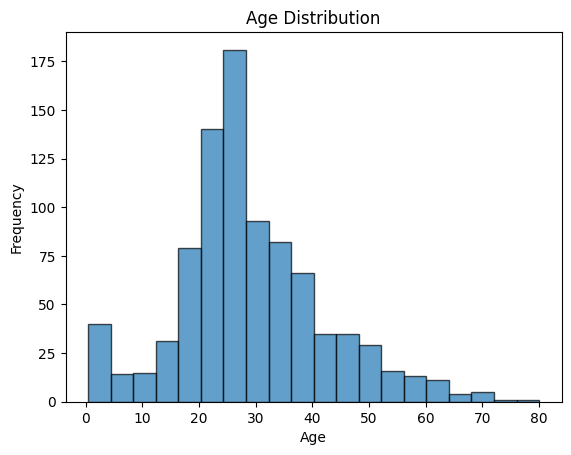

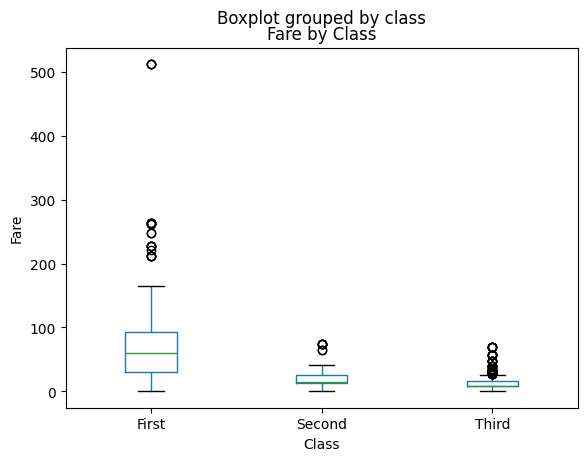

/tmp/ipython-input-196811314.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df.groupby('age_group')['survived'].mean()


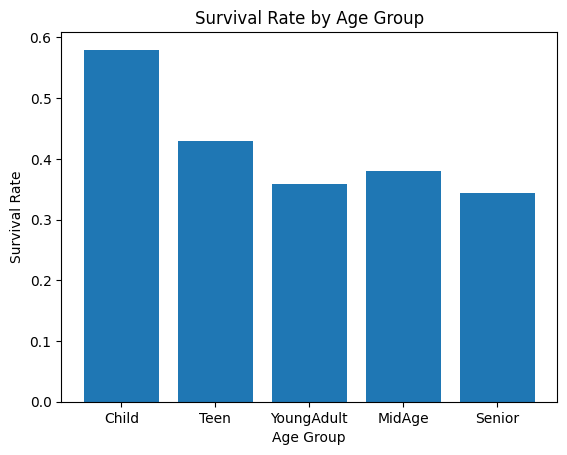

In [ ]:
# YOUR WORK: Exercise B
plt.hist(df['age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
df.boxplot(column='fare', by='class', grid=False)
plt.title('Fare by Class')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()
survival_by_age = df.groupby('age_group')['survived'].mean()
plt.bar(survival_by_age.index, survival_by_age.values)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

## C) Subgroup Discovery

In [ ]:
grp = (df.groupby(['sex','class','embark_town'])
         .agg(n=('survived','size'), surv_rate=('survived','mean'))
         .query('n >= 25')
         .sort_values('surv_rate', ascending=False))
grp.head(10)

### ✅ Exercise C
Families with `family_size≥4`: survival by `sex` & `class` (n + rate). Bucket `fare_pp` and compute survival per bucket.

**Hints:**
- Concept: subgroup analysis with thresholds.
- API: `groupby().agg`, `query`, `cut`.


In [ ]:
# YOUR WORK: Exercise C
family_survival = df.query('family_size >= 4')
family_survival_stats = family_survival.groupby(['sex', 'class']).agg(n=('survived', 'size'), surv_rate=('survived', 'mean'))
print(family_survival_stats)
fare_pp_bins = [0, 10, 20, 30, 50, np.inf]
df['fare_pp_bucket'] = pd.cut(df['fare_pp'], bins=fare_pp_bins)
fare_pp_survival = df.groupby('fare_pp_bucket')['survived'].mean()
print(fare_pp_survival)


                n  surv_rate
sex    class                
female First    8      0.750
       Second  11      1.000
       Third   33      0.242
male   First    5      0.600
       Second   4      0.250
       Third   30      0.067
fare_pp_bucket
(0.0, 10.0]     0.278
(10.0, 20.0]    0.431
(20.0, 30.0]    0.562
(30.0, 50.0]    0.549
(50.0, inf]     0.727
Name: survived, dtype: float64


/tmp/ipython-input-3492148447.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  family_survival_stats = family_survival.groupby(['sex', 'class']).agg(n=('survived', 'size'), surv_rate=('survived', 'mean'))
/tmp/ipython-input-3492148447.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_pp_survival = df.groupby('fare_pp_bucket')['survived'].mean()


## D) Deliverables

In [ ]:
top10 = grp.head(10).reset_index()
sty = (top10.style.format({'surv_rate':'{:.2%}'}).hide(axis='index'))
html = sty.to_html()
open('titanic_top10_survival.html','w',encoding='utf-8').write(html)
top10.to_csv('titanic_top10_survival.csv', index=False)
"Saved titanic_top10_survival.html and titanic_top10_survival.csv"

### ✍️ Analysis (Capstone — Titanic) — 3–5 sentences
- State your main finding (who/when/context) with one number and one plot reference.
- Name one limitation in your approach (bias, leakage, imputation).
- Suggest a next step or feature to add.

### 🔎 Quick checks
- Link the exact cell/table backing your claim.
- Confirm deliverables (HTML + CSV) were written.

### ➕ Extension (pick one)
- Add an extra feature (e.g., `is_child`, z-scored fare) and see if subgroup ranking changes.
- Try a different minimum group size and discuss stability.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1